In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

from datetime import date

Importing plotly failed. Interactive plots will not work.
Today's date: 2021-04-15
Today's date: 2021-04-15


In [2]:
today = date.today()

In [3]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
C:\Users\j_kei\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
WetterVorhersage = WetterVorhersageNBG();

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/35.4M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 768k/35.4M [00:00<00:04, 7.71MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.46M/35.4M [00:00<00:04, 7.61MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.17M/35.4M [00:00<00:04, 7.54MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.88M/35.4M [00:00<00:04, 7.47MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|█         | 3.58M/35.4M [00:00<00:04, 7.40MiB/s]
https://opendata.dwd.de/weathe

DataError: No numeric types to aggregate

In [7]:
df_test = df

In [8]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-04-15'}, xlabel='Date'>

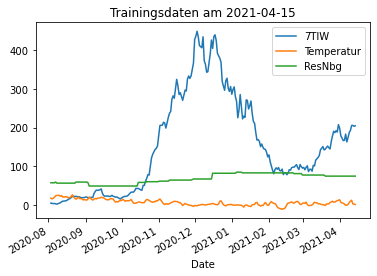

In [9]:
df_test.plot(title='Trainingsdaten am '+str(today))

In [10]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [11]:
df_test

,ds,y,Temperatur,ResNbg
0,2020-08-03,5.598456,18.4,57.87
1,2020-08-04,4.633205,16.3,57.87
2,2020-08-05,4.247104,18.1,57.87
3,2020-08-06,4.633205,20.9,57.87
4,2020-08-07,3.861004,24.2,59.72
...,...,...,...,...
241,2021-04-10,192.664093,10.3,75.00
242,2021-04-11,205.212355,13.0,75.00
243,2021-04-12,205.598456,3.5,75.00
244,2021-04-13,203.281853,3.0,75.00


In [8]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

NameError: name 'df_test' is not defined

In [11]:
#WetterVorhersage.head(20)

In [7]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

NameError: name 'm' is not defined

In [6]:
future['Temperatur'] = future.join(WetterVorhersage)
#future['Temperatur'] = 50
future['ResNbg'] = 75
future = future.reset_index()

NameError: name 'future' is not defined

In [14]:
#future.tail(20)

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2021-04-18,225.583139,203.677950,246.395136
6,2021-04-19,230.564264,206.359939,254.755485
7,2021-04-20,234.793406,210.215467,259.935977
8,2021-04-21,233.920305,206.226287,261.998346
9,2021-04-22,238.557168,210.470364,270.426658


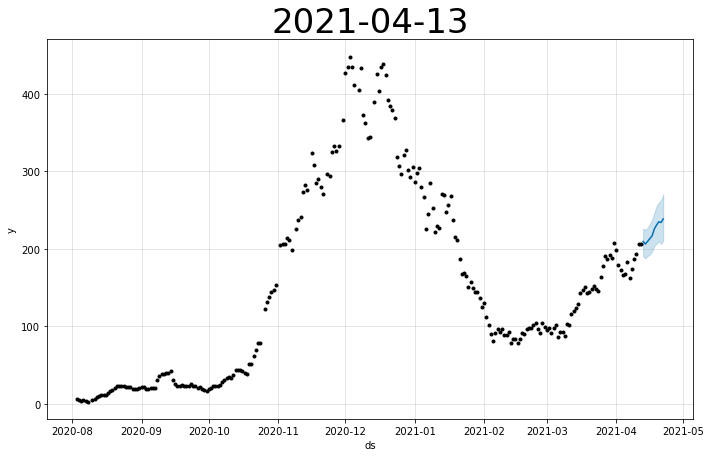

In [18]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)
fig.savefig('Vorhersagen/'+str(today)+'.png')
#plt.close(fig)

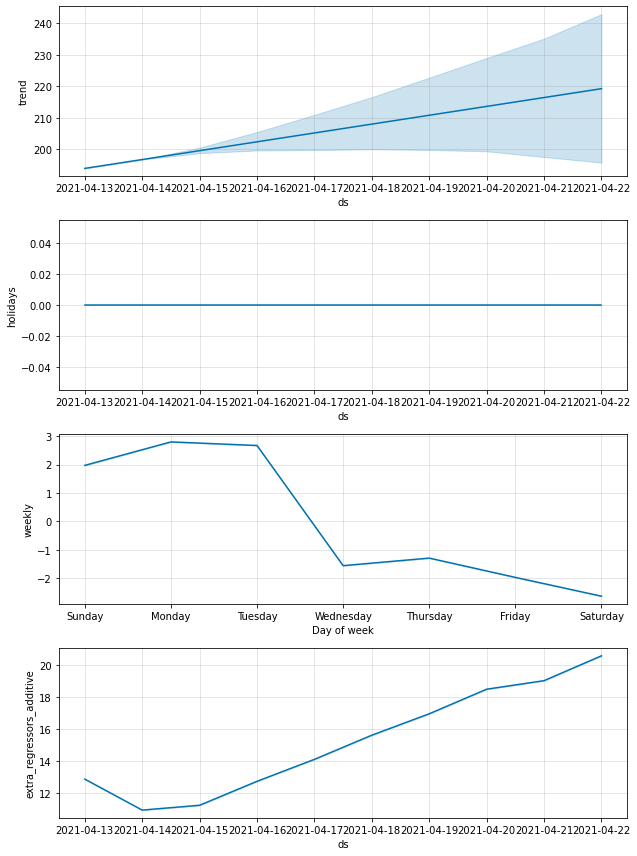

In [17]:
fig2 = m.plot_components(forecast)

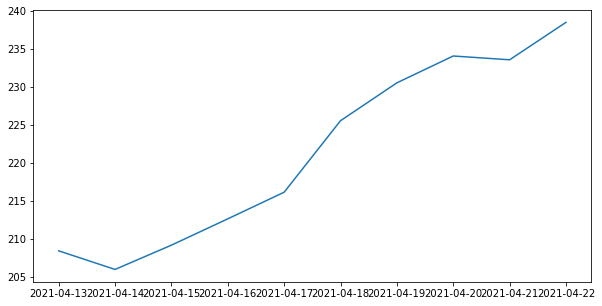

In [30]:
#import gradio as gr


#def spectrogram(Restriktionen):
    #plt.rcParams["figure.figsize"] = (10,5)
    #plt.plot(forecast['ds'],forecast['yhat'])
    #return plt


#iface = gr.Interface(spectrogram, "slider", "plot")

#iface.test_launch()
#iface.launch()